In [0]:
 %restart_python

In [0]:
%pip install kaggle

Note: you may need to restart the kernel using %restart_python or dbutils.library.restartPython() to use updated packages.


In [0]:
download_path ="/Volumes/workspace/default/netflix/kaggle"
dbutils.fs.mkdirs(download_path)

True

In [0]:
import os
os.environ['KAGGLE_USERNAME'] = "ankitahub"
os.environ['KAGGLE_KEY'] ="10ab0b2b8f256946825ceb12f5c30199"

In [0]:
!kaggle datasets download -d shivamb/netflix-shows -p {download_path} --unzip

Dataset URL: https://www.kaggle.com/datasets/shivamb/netflix-shows
License(s): CC0-1.0
 75%|████████████████████████████▍         | 1.00M/1.34M [00:00<00:00, 7.44MB/s]
100%|██████████████████████████████████████| 1.34M/1.34M [00:00<00:00, 6.28MB/s]


In [0]:
import pandas as pd
df = pd.read_csv(download_path+"/netflix_newcleaned.csv")

In [0]:
print("Missing values before cleaning:\n", df.isnull().sum())

Missing values before cleaning:
 show_id          0
content_type     0
title            0
director         0
cast             0
country          0
date_added       0
release_year     0
rating           0
duration         0
genres           0
description      0
duration_int     3
duration_type    0
dtype: int64


In [0]:
df.duplicated().sum()


0

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
df

,show_id,content_type,title,director,cast,country,date_added,release_year,rating,duration,genres,description,duration_int,duration_type
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90.0,min
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Season,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2.0,Season
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,1.0,Season
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",1.0,Season
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Season,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2.0,Season
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",158.0,min
8803,s8804,TV Show,Zombie Dumb,Unknown,Unknown,Unknown,"July 1, 2019",2018,TV-Y7,2 Season,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",2.0,Season
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,88.0,min
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",88.0,min


Index(['show_id', 'content_type', 'title', 'director', 'cast', 'country',
       'date_added', 'release_year', 'rating', 'duration', 'genres',
       'description', 'duration_int', 'duration_type'],
      dtype='object')


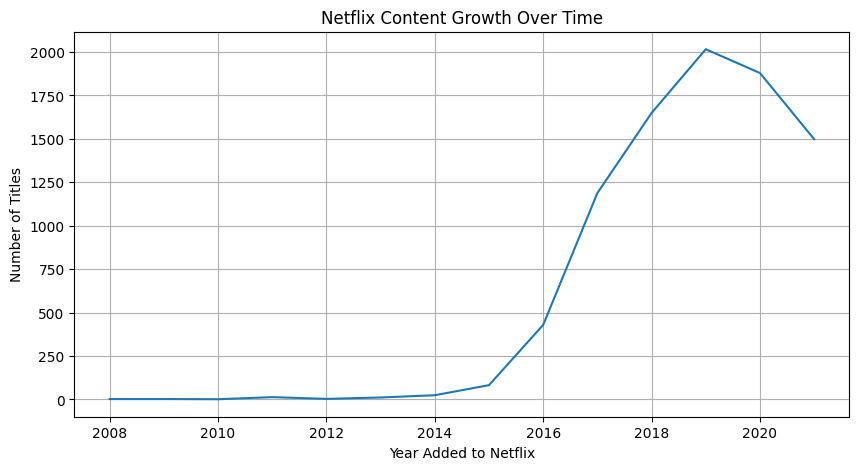

In [0]:
# Check column names to find release or date-added column
print(df.columns)

# Convert 'release_year' or 'date_added' to datetime (if exists)
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Extract the year
df['year_added'] = df['date_added'].dt.year

# Count number of titles per year
content_per_year = df['year_added'].value_counts().sort_index()

# Plot content growth
plt.figure(figsize=(10,5))
sns.lineplot(x=content_per_year.index, y=content_per_year.values)
plt.title("Netflix Content Growth Over Time")
plt.xlabel("Year Added to Netflix")
plt.ylabel("Number of Titles")
plt.grid(True)
plt.show()


/home/spark-3ed90a16-8436-4f17-b50a-b4/.ipykernel/4523/command-4733576494167031-3772558685:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='content_type', data=df, palette='pastel')


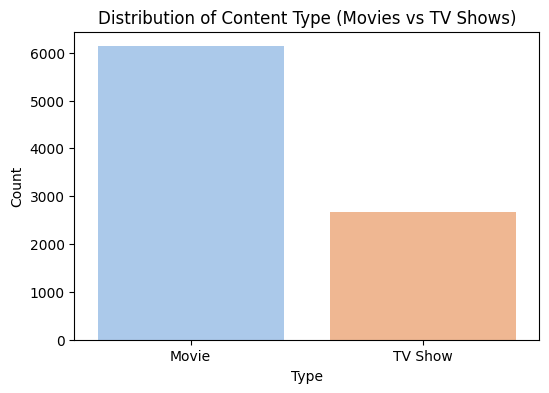

In [0]:
plt.figure(figsize=(6,4))
sns.countplot(x='content_type', data=df, palette='pastel')
plt.title("Distribution of Content Type (Movies vs TV Shows)")
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()


/home/spark-3ed90a16-8436-4f17-b50a-b4/.ipykernel/4523/command-4733576494167032-1976037810:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='rating', data=df, order=df['rating'].value_counts().index, palette='cool')


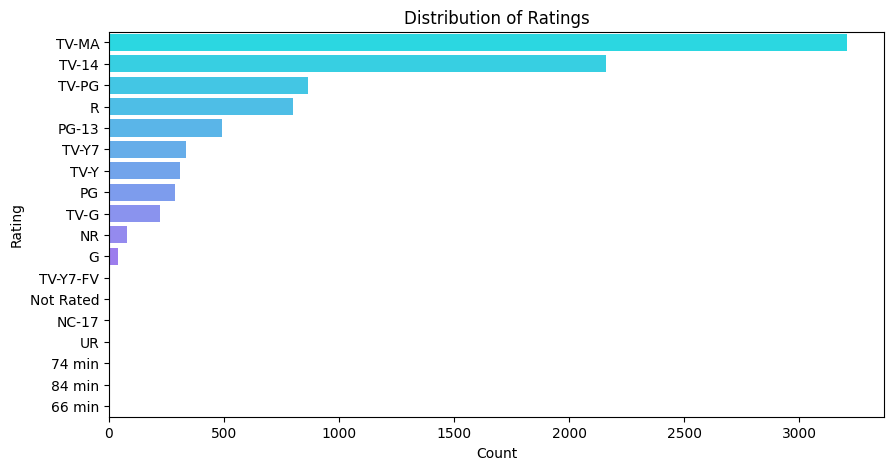

In [0]:
plt.figure(figsize=(10,5))
sns.countplot(y='rating', data=df, order=df['rating'].value_counts().index, palette='cool')
plt.title("Distribution of Ratings")
plt.xlabel("Count")
plt.ylabel("Rating")
plt.show()


/home/spark-3ed90a16-8436-4f17-b50a-b4/.ipykernel/4523/command-4733576494167033-3202730361:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Genre', data=top_genres, palette='magma')


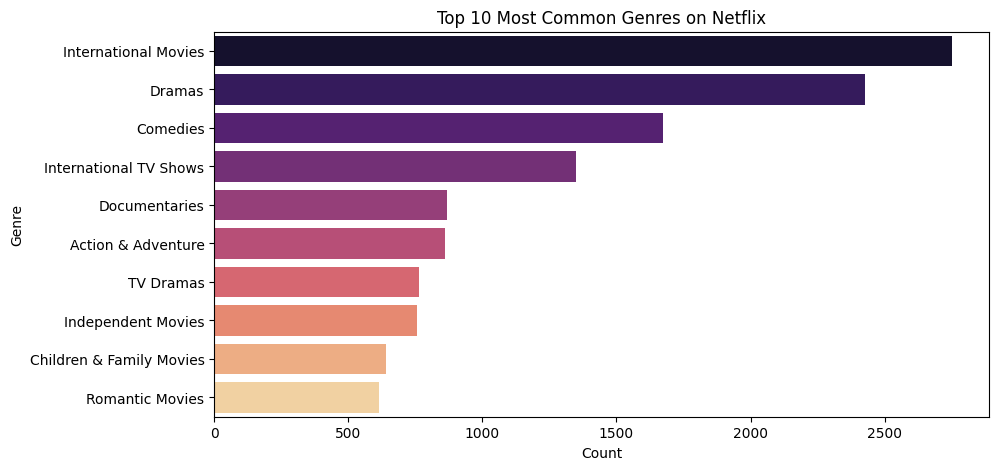

In [0]:
# Some rows may have multiple genres separated by commas
df['genres'] = df['genres'].astype(str)

# Split and count
from collections import Counter
genre_list = df['genres'].str.split(', ')
genres = [g for sublist in genre_list for g in sublist]
top_genres = pd.DataFrame(Counter(genres).most_common(10), columns=['Genre', 'Count'])

# Plot
plt.figure(figsize=(10,5))
sns.barplot(x='Count', y='Genre', data=top_genres, palette='magma')
plt.title("Top 10 Most Common Genres on Netflix")
plt.show()


/home/spark-3ed90a16-8436-4f17-b50a-b4/.ipykernel/4523/command-4733576494167034-354332219:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Country', data=top_countries, palette='viridis')


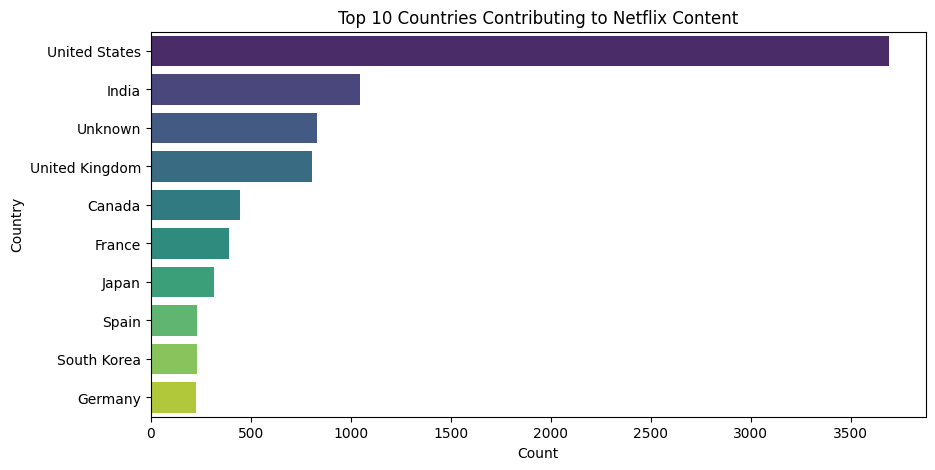

In [0]:
df['country'] = df['country'].astype(str)
country_list = df['country'].str.split(', ')
countries = [c for sublist in country_list for c in sublist]
top_countries = pd.DataFrame(Counter(countries).most_common(10), columns=['Country', 'Count'])

# Plot
plt.figure(figsize=(10,5))
sns.barplot(x='Count', y='Country', data=top_countries, palette='viridis')
plt.title("Top 10 Countries Contributing to Netflix Content")
plt.show()


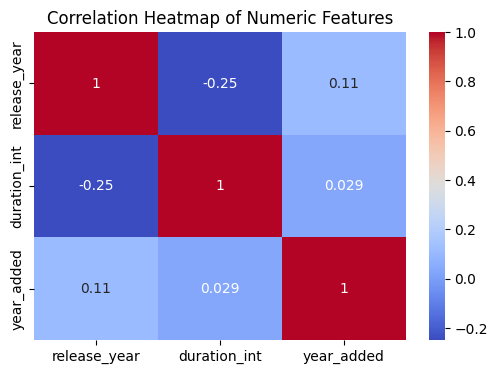

In [0]:
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Numeric Features")
plt.show()


Red / Dark Orange	Strong Positive Correlation	e.g. release_year ↑ → year_added ↑

🔵 Blue / Dark Purple	Strong Negative Correlation	e.g. duration_int ↓ → year_added ↑

⚪ White / Light Colors	Weak or No Correlation

FEATURE ENGINEERING

In [0]:
def categorize_duration(row):
    if row['duration_type'] == 'min':  # For Movies
        if row['duration_int'] < 60:
            return 'Short'
        elif 60 <= row['duration_int'] <= 120:
            return 'Medium'
        else:
            return 'Long'
    elif row['duration_type'] == 'Season':  # For TV Shows
        if row['duration_int'] == 1:
            return 'Single Season'
        else:
            return 'Multi Season'
    else:
        return 'Unknown'

df['Content_Length_Category'] = df.apply(categorize_duration, axis=1)


In [0]:
def label_original(row):
    title = str(row['title']).lower()
    description = str(row.get('description', '')).lower()
    if 'netflix' in title or 'netflix' in description:
        return 'Netflix Original'
    else:
        return 'Licensed'

df['Original_vs_Licensed'] = df.apply(label_original, axis=1)


In [0]:
df[['title', 'duration_int', 'duration_type', 'Content_Length_Category', 'Original_vs_Licensed']]


,title,duration_int,duration_type,Content_Length_Category,Original_vs_Licensed
0,Dick Johnson Is Dead,90.0,min,Medium,Licensed
1,Blood & Water,2.0,Season,Multi Season,Licensed
2,Ganglands,1.0,Season,Single Season,Licensed
3,Jailbirds New Orleans,1.0,Season,Single Season,Licensed
4,Kota Factory,2.0,Season,Multi Season,Licensed
...,...,...,...,...,...
8802,Zodiac,158.0,min,Long,Licensed
8803,Zombie Dumb,2.0,Season,Multi Season,Licensed
8804,Zombieland,88.0,min,Medium,Licensed
8805,Zoom,88.0,min,Medium,Licensed


In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", palette="pastel")

/home/spark-3ed90a16-8436-4f17-b50a-b4/.ipykernel/4523/command-4697486304876533-2403496366:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Content_Length_Category', data=df, palette='coolwarm')


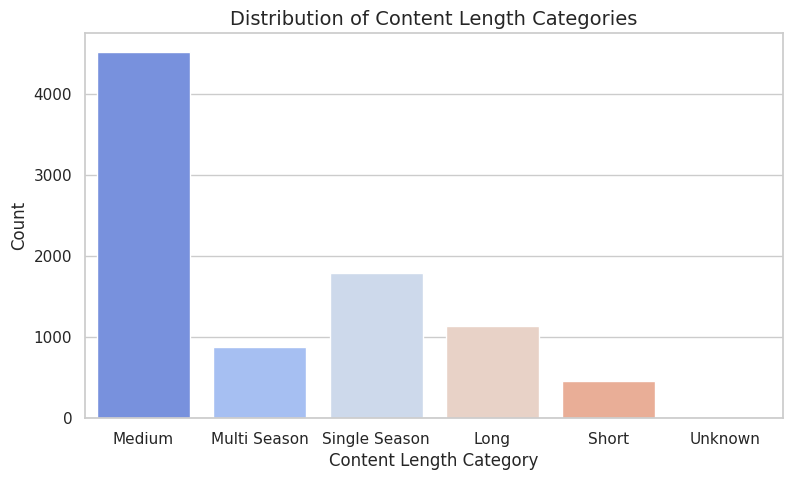

In [0]:
plt.figure(figsize=(9,5))
sns.countplot(x='Content_Length_Category', data=df, palette='coolwarm')
plt.title('Distribution of Content Length Categories', fontsize=14)
plt.xlabel('Content Length Category')
plt.ylabel('Count')
plt.show()


/home/spark-3ed90a16-8436-4f17-b50a-b4/.ipykernel/4523/command-4697486304876534-1387335591:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Original_vs_Licensed', data=df, palette='viridis')


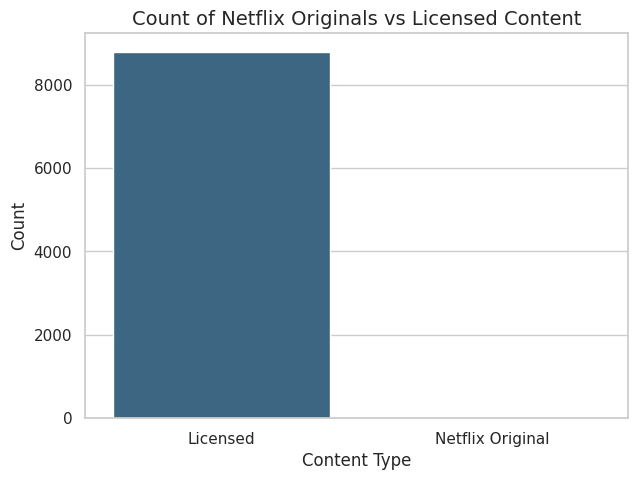

In [0]:
plt.figure(figsize=(7,5))
sns.countplot(x='Original_vs_Licensed', data=df, palette='viridis')
plt.title('Count of Netflix Originals vs Licensed Content', fontsize=14)
plt.xlabel('Content Type')
plt.ylabel('Count')
plt.show()


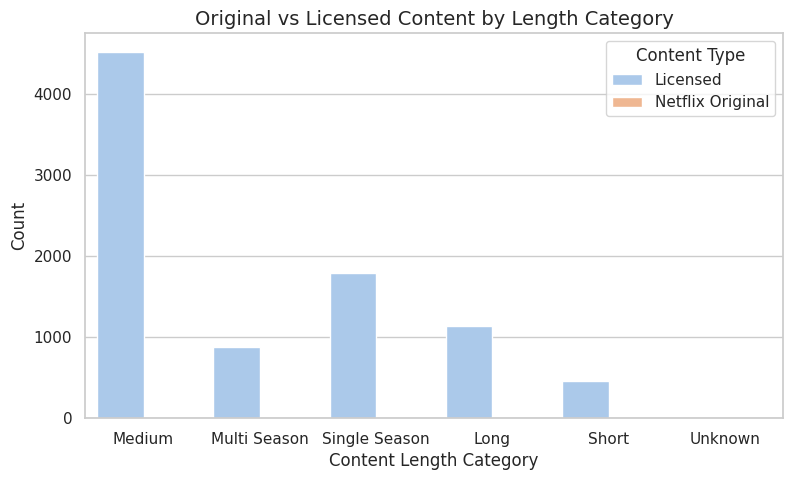

In [0]:
plt.figure(figsize=(9,5))
sns.countplot(x='Content_Length_Category', hue='Original_vs_Licensed', data=df)
plt.title('Original vs Licensed Content by Length Category', fontsize=14)
plt.xlabel('Content Length Category')
plt.ylabel('Count')
plt.legend(title='Content Type')
plt.show()


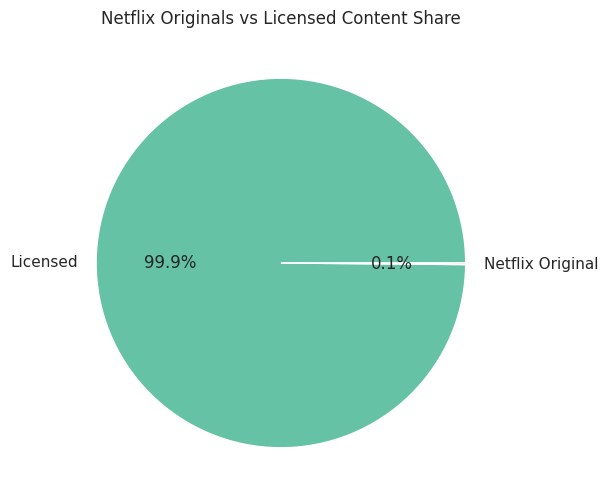

In [0]:
counts = df['Original_vs_Licensed'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', colors=sns.color_palette('Set2'))
plt.title('Netflix Originals vs Licensed Content Share')
plt.show()


In [0]:

df.to_csv(f"{download_path}/netflix_feature_engineeredned.csv", index=False)
